# Regularization

teknik untuk membuat model lebih "halus" supaya tidak overfit. Teknik umum termasuk:

- L1: Lasso Regression
- L2: Ridge Regression
- Elastic Net (gabungan L1 dan L2)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error

from sklearn.decomposition import PCA

In [2]:
# kita coba dengan data insurance
df_insurance = pd.read_csv("dataset/insurance.csv")
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# rapiin data, pisahkan fitur dan target
X = df_insurance.drop(columns=['charges'])
y = df_insurance['charges']

In [10]:
# encode data jadi numerik
encoder = LabelEncoder()
X['sex'] = encoder.fit_transform(X['sex'])
print('sex', encoder.classes_)

encoder = LabelEncoder()
X['smoker'] = encoder.fit_transform(X['smoker'])
print('smoker', encoder.classes_)

encoder = LabelEncoder()
X['region'] = encoder.fit_transform(X['region'])
print('region', encoder.classes_)

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


In [11]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [13]:
# split data jadi train data dan test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 6) (936,)
(402, 6) (402,)


kita coba bandingkan model nya dibuat dengan 4 cara berbeda:

- Linear Regression tanpa Regularization
- dengan Ridge (L2)
- dengan Lasso (L1)
- ElasticNet (L1 + L2)

Sekalian kita coba gunakan Pipeline supaya 4 model ini bisa kita jalankan dengan 1 set code, bukan copy paste 4 kali


In [ ]:
# perbandingan model dengan dan tanpa regularization
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_elasticnet = ElasticNet()

arr_models = [model_linear, model_ridge, model_lasso, model_elasticnet]
arr_model_results = []
for model in arr_models:
    # latih model
    model.fit(X_train, y_train)

    # pakai model untuk membuat prediksi
    y_pred = model.predict(X_test)

    # dari hasil prediksi kita bisa test "akurasi" model ini misalnya dengan rmse
    rmse = root_mean_squared_error(y_test, y_pred)
    arr_model_results.append(rmse)

arr_model_results

[5829.388167655626, 5818.734090656937, 5828.77583723319, 8899.36228875477]

dari hasil rmse nya, terlihat kalau base error dari model linear kita di 5829, regularization hanya berefek sedikit L1 maupun L2 untuk mengurangi error tersebut, tapi elasticnet jadi bertambah banyak. kemungkinan justru elasticnet regularization nya berlebihan hingga model underfit.


untuk dibuat visualisasi impact dari regularization, kita bisa coba gunakan polynomial regression dan gunakan 1 fitur saja

kita bisa "gabungkan" semua fitur menjadi 1 menggunakan PCA, mengurangi dimensi data tanpa menghapus fitur

1. PCA
2. Polynomial Regression model
3. Compare rmse: no regularization, L1, L2, L1+L2
4. Visualize models


In [ ]:
# 1. PCA
model_pca = PCA(n_components=1)

# kita gunakan data awal lagi sebelum di split
X_pca1 = model_pca.fit_transform(X)

In [20]:
X_pca1.shape

(1338, 1)

In [21]:
# split datanya yang sudah di pca
X_train, X_test, y_train, y_test = train_test_split(
    X_pca1, y, test_size=0.3, random_state=8)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 1) (402, 1) (936,) (402,)


In [41]:
# prep untuk buat model polynomial regression
poly = PolynomialFeatures(degree=100)
X_poly_train = poly.fit_transform(X_train)

X_poly_test = poly.fit_transform(X_test)

In [44]:
# 2. Linear Regression (with Polynomial Features)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=10),
    "ElasticNet": ElasticNet(alpha=10, l1_ratio=0.5)
}
models_fitted = {}
for name, model in models.items():
    # latih model
    model.fit(X_poly_train, y_train)

    # simpan model yang sudah dilatih ke dictionary models_fitted
    models_fitted[name] = model

    # pakai model untuk membuat prediksi
    y_pred = model.predict(X_poly_test)

    # dari hasil prediksi kita bisa test "akurasi" model ini misalnya dengan rmse
    rmse = root_mean_squared_error(y_test, y_pred)
    print(name, rmse)

Linear 11660.917218004515
Ridge 11637.180705542783
Lasso 11103.388700197373
ElasticNet 11130.881360068266


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.381e+10, tolerance: 1.398e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.391e+10, tolerance: 1.398e+07
  model = cd_fast.enet_coordinate_descent(


rmse ke-4 model ini hampir sama jadi mungkin tidak terlihat perbedaan di hasil visualisasi nanti


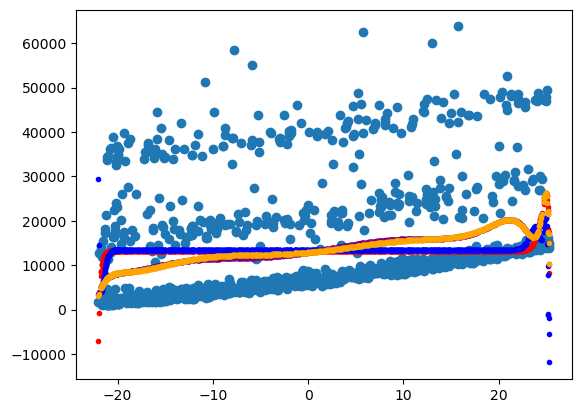

In [45]:
# X_pca1 dan y
plt.scatter(X_pca1, y)

X_poly = poly.fit_transform(X_pca1)
y_pred_models = {
    "Linear": models_fitted['Linear'].predict(X_poly),
    "Ridge": models_fitted['Ridge'].predict(X_poly),
    "Lasso": models_fitted['Lasso'].predict(X_poly),
    "ElasticNet": models_fitted['ElasticNet'].predict(X_poly),
}

plt.scatter(X_pca1, y_pred_models['Linear'], color='red', marker=".")
plt.scatter(X_pca1, y_pred_models['Ridge'], color='blue', marker=".")
plt.scatter(X_pca1, y_pred_models['Lasso'], color='purple', marker=".")
plt.scatter(X_pca1, y_pred_models['ElasticNet'], color='orange', marker=".")